In [1]:
#The task is to train a machine learning model that can learn from the measurement of the iris species and classify them
#first i will import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#IMPORTING THE DATA SET AND VIEWING
iris=pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#get the shape of the data
iris.shape

(150, 6)

In [4]:
##check for the information about the data set
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
##check for null or missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# description of the data for the continous columns 
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


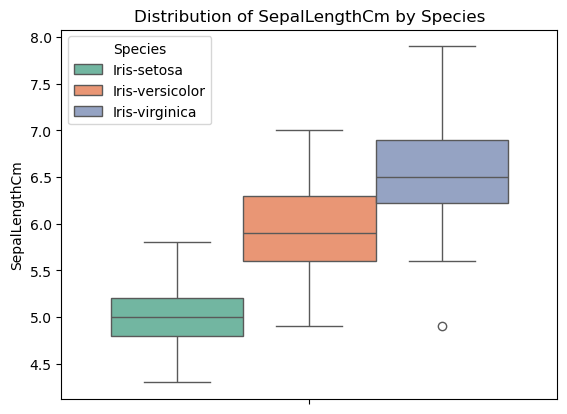

In [37]:
#visualization to know more about the data
#Explore and visualize the data.
#Boxplot for Feature Distributions by Species
sn.boxplot(hue='Species', y="SepalLengthCm", data=iris,palette="Set2")
plt.title(f"Distribution of SepalLengthCm by Species")
plt.show()

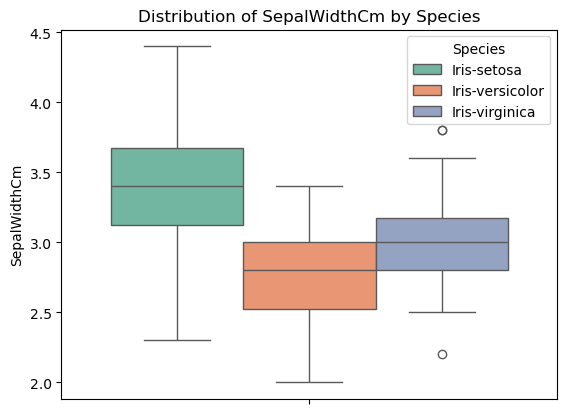

In [16]:
#Distribution of SepalWidthCm by Species
sn.boxplot(hue='Species', y="SepalWidthCm", data=iris,palette="Set2")
plt.title(f"Distribution of SepalWidthCm by Species")
plt.show()

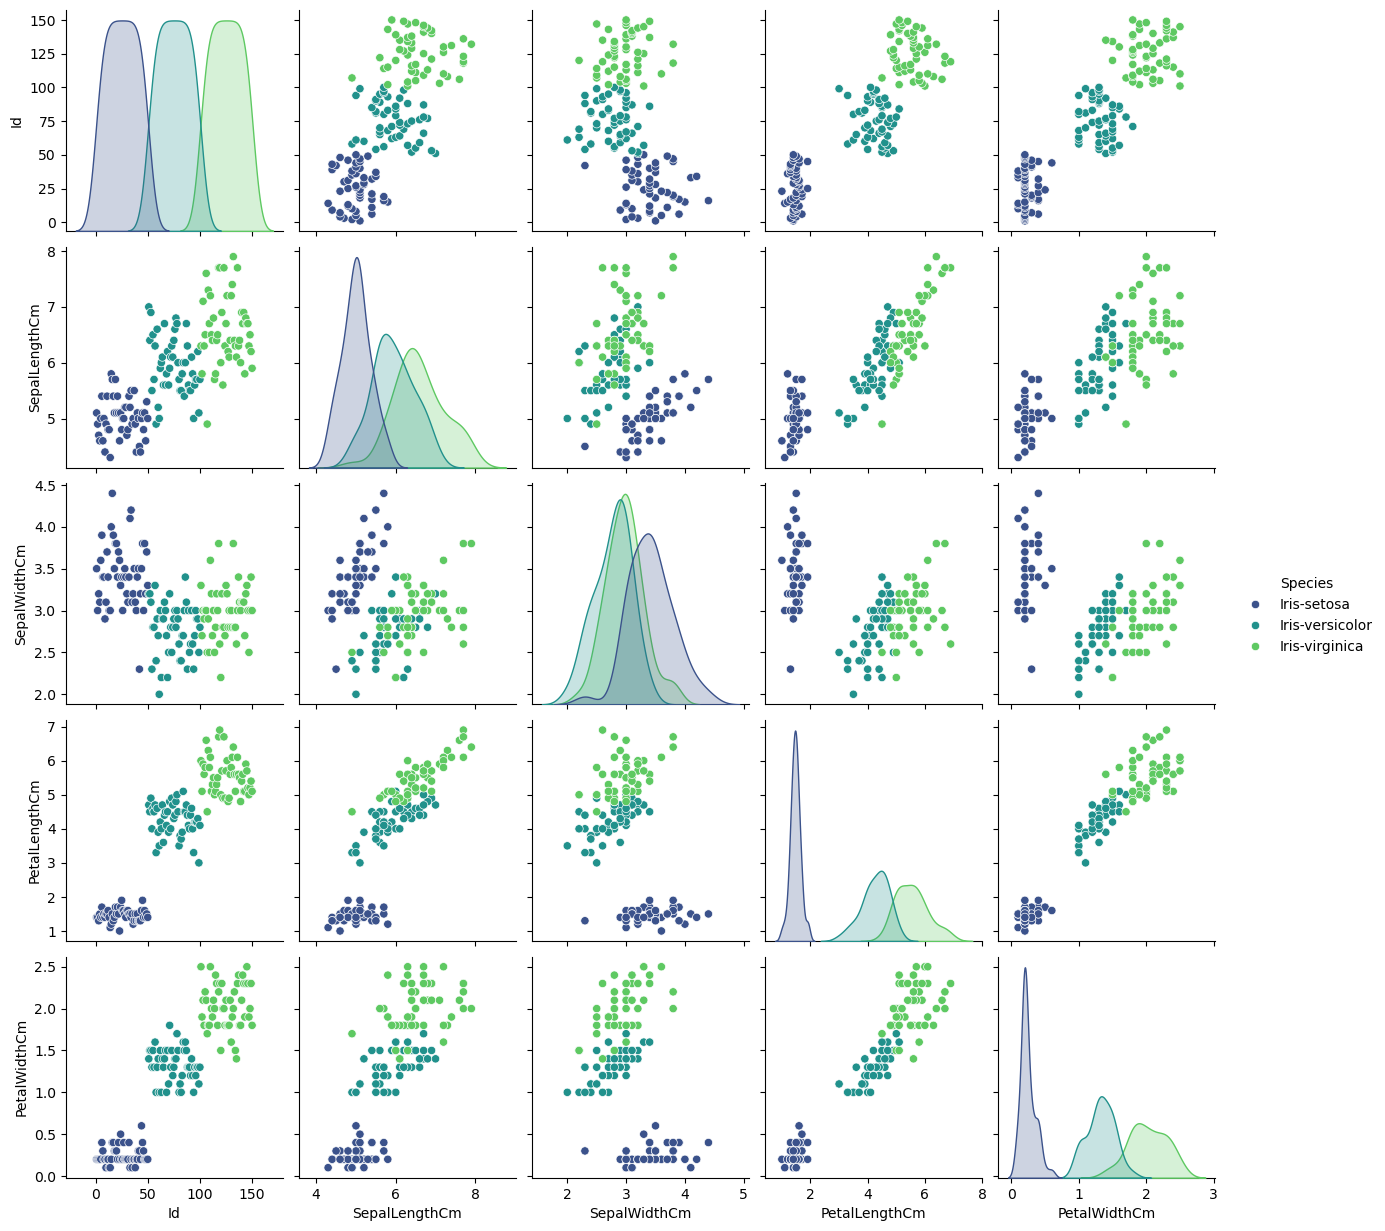

In [20]:
# Pairplot with species hue
sn.pairplot(data=iris, hue='Species', palette='viridis')
plt.show()

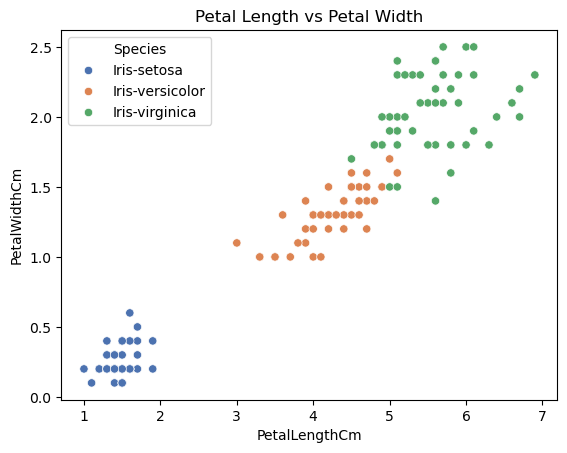

In [21]:
#Create scatter plots with the most distinct features, such as petal length vs. petal width.
sn.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris, palette='deep')
plt.title("Petal Length vs Petal Width")
plt.show()

In [23]:
# Select only continuous variables (numerical data)
continuous_data = iris.select_dtypes(include=['float64'])
# Compute the correlation matrix
correlation_matrix = continuous_data.corr()

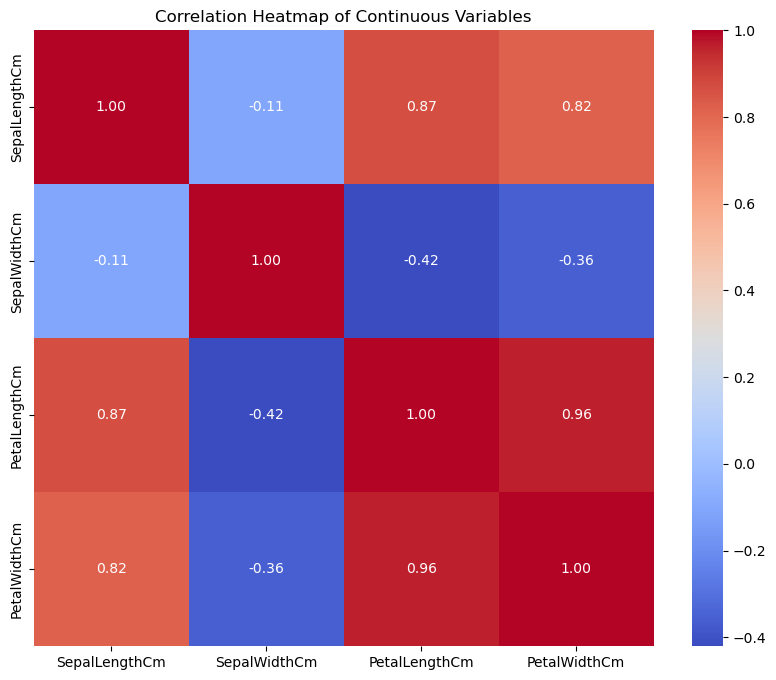

In [25]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

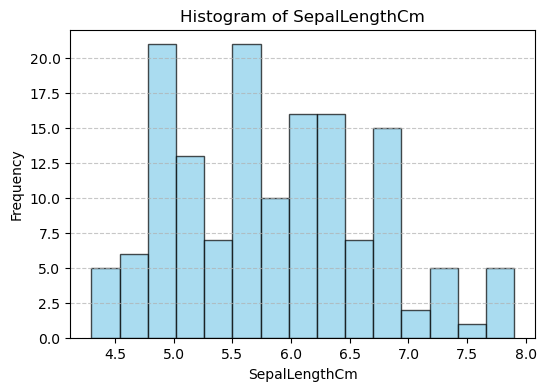

In [34]:
#histogram for the countious variables
plt.figure(figsize=(6, 4))
plt.hist(iris["SepalLengthCm"], bins=15, color='skyblue', edgecolor='black', alpha=0.7,)
plt.title("Histogram of SepalLengthCm")
plt.xlabel("SepalLengthCm")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

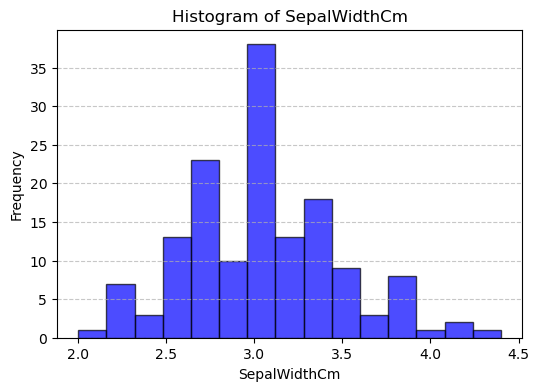

In [36]:
#histogram for the countious variables
plt.figure(figsize=(6, 4))
plt.hist(iris["SepalWidthCm"], bins=15, color='blue', edgecolor='black', alpha=0.7,)
plt.title("Histogram of SepalWidthCm")
plt.xlabel("SepalWidthCm")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
##Split into training and testing sets.
#Divide the dataset into training and testing sets to evaluate the model
from sklearn.model_selection import train_test_split #importing the necessary libraries

In [40]:
# Feature columns
X = iris.iloc[:, :-1] 
# Target column
y = iris['Species']    

In [44]:
# Split data we Assuming X contains features and y contains the target variable, the test size suggest 30 %testing and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
print(X_train)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
81    82            5.5           2.4            3.7           1.0
133  134            6.3           2.8            5.1           1.5
137  138            6.4           3.1            5.5           1.8
75    76            6.6           3.0            4.4           1.4
109  110            7.2           3.6            6.1           2.5
..   ...            ...           ...            ...           ...
71    72            6.1           2.8            4.0           1.3
106  107            4.9           2.5            4.5           1.7
14    15            5.8           4.0            1.2           0.2
92    93            5.8           2.6            4.0           1.2
102  103            7.1           3.0            5.9           2.1

[105 rows x 5 columns]


In [46]:
#Training a Machine Learning Model 
#The model learns from the training dataset, where it uses the features to predict the target.
#Choosing the Right Algorithm i will select the Classification model that Predict categories.
# i willl select Random Forest which is suitable for small datasets with good classification performance.
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Initialize the Random Forest Classifier
#Number of trees in the forest and Maximum depth of each tree.
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

In [49]:
#Train the Model
# Fit the model to the training data
#The model processes the input data (X_train) and corresponding labels (y_train).
#It learns the relationship between input features and the target.
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
#Evaluate the Model
#evaluate the model to understand how well it performs on unseen data.
#The evaluation process includes calculating performance metrics, inspecting confusion matrices, and performing cross-validation.
#first we gonna import the libraries for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
# Predict on the test set
y_pred = model.predict(X_test)

In [54]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [55]:
#inspecting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [58]:
# Classification Report
#The classification report provides a detailed summary of precision, recall, and F1-score for each class (species in the case of the Iris dataset), 
#as well as the average across all classes.
#Precision tells us how many of the predicted instances for each class were actually correct.
#Recall indicates how many of the actual instances for each class were correctly identified by the model.
#F1-Score balances precision and recall.
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [59]:
#Perform Cross-Validation
#Validate the model's performance on multiple subsets of data to avoid overfitting.
#first i will import the library needed
from sklearn.model_selection import cross_val_score

In [60]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.95


In [64]:
# Check if model has been trained
print(model)  # Check model details after fitting

RandomForestClassifier(random_state=42)


In [78]:
#Make Predictions
#i will use the trained model to make predictions on new data.
# Example new data
 # Measurements for a flower
new_data = [[2.4,4.6,1.5,8.9,2.7]]
predicted_class = model.predict(new_data)
prediction = model.predict(new_data)
print(f"Predicted Class: {[predicted_class[0]]}")

Predicted Class: ['Iris-versicolor']


C:\Users\martin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\martin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
new_data = [[0.1,2.3,0.5,0.8,0.7]]
predicted_class = model.predict(new_data)
prediction = model.predict(new_data)
print(f"Predicted Class: {[predicted_class[0]]}")

Predicted Class: ['Iris-setosa']


C:\Users\martin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\martin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
